In [1]:
#Data Analysis and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

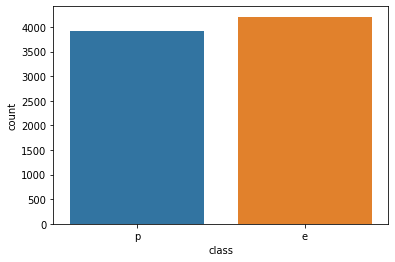

In [6]:
sns.countplot(df["class"])

<Figure size 1008x432 with 0 Axes>

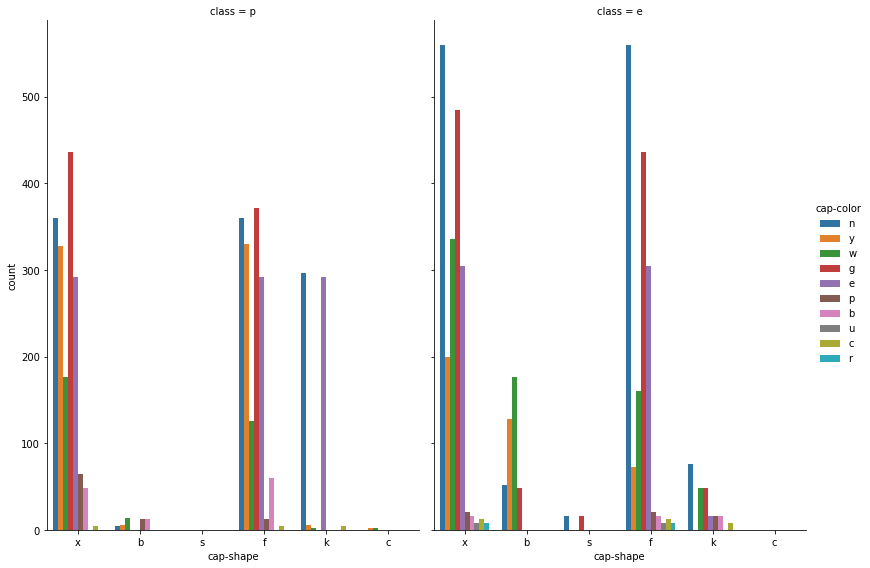

In [7]:
plt.figure(figsize=(14,6))
g=sns.catplot(x="cap-shape",hue="cap-color",col="class",data=df,kind="count",height=8,aspect=.7)

In [8]:
#White Coloured and Bell Shaped Mushrooms are highly recommended for eating
#Red Coloured Knobbed Shaped Mushrooms are poisonous

<Figure size 1008x432 with 0 Axes>

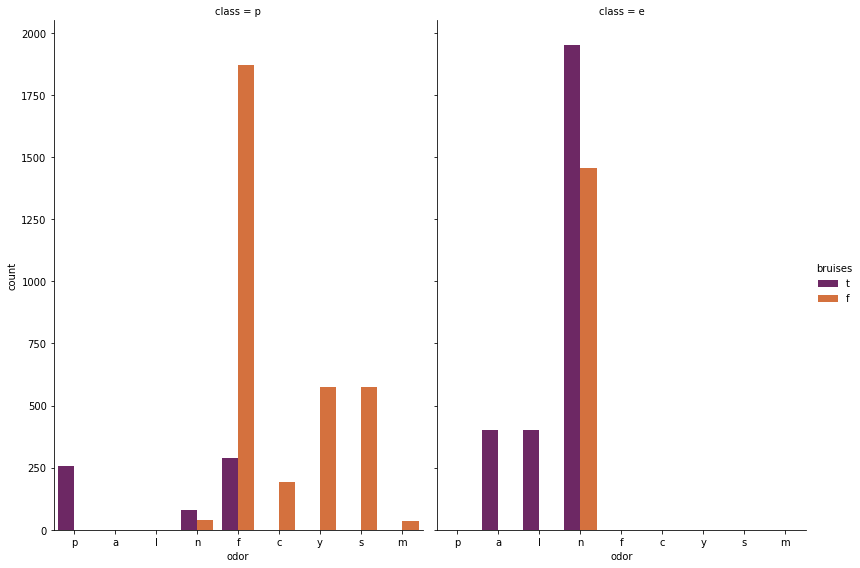

In [9]:
plt.figure(figsize=(14,6))
g=sns.catplot(x="odor",hue="bruises",col="class",data=df,kind="count",height=8,aspect=.7,palette="inferno")

In [10]:
#Odourless and Bruised Mushrooms are highly recommended for eating
#Fishly Odour with No Bruises Mushrooms are poisonous

In [12]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
x=df.drop(["class"],axis=1)
y=df["class"]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [15]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0,max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [16]:
dt.score(x_train,y_train)

0.9778403095321843

In [17]:
predictions=dt.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9827727645611156

In [19]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=5)

In [20]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

C:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9913823425958495

In [21]:
predictions=rf.predict(x_test)
rf.score(x_test,y_test)

0.9913863822805579

In [22]:
accuracy_score(y_test,predictions)

0.9913863822805579